In [1]:
!pip3 install psycopg2-binary

  Using cached psycopg2_binary-2.9.6-cp39-cp39-win_amd64.whl (1.2 MB)


# Fetching both the dataset from postgresql DB for merging

In [2]:
import psycopg2
import pandas as pd
conn = psycopg2.connect(
    host="localhost",
        port=5432,
        database="postgres",
        user="postgres",
        password="dap"

)

cur = conn.cursor()
cur.execute("SELECT * FROM vechicale_table")
vechile = cur.fetchall()
vechile_df= pd.DataFrame(vechile)
vechile_df.columns = [desc[0] for desc in cur.description]


cur = conn.cursor()
cur.execute("SELECT * FROM air_pollution")
air_pollution = cur.fetchall()
air_pollution_df= pd.DataFrame(air_pollution )
air_pollution_df.columns = [desc[0] for desc in cur.description]


cur.close()
conn.close()

In [3]:
#renaming the columns and storing it in a variable
vechile_df_na=vechile_df.rename(columns={'Model Year': 'EV_year','Electric Range': 'no_vehicle'})

In [4]:
#selecting first 1000 rows and 
vechical_df_re = vechile_df_na.loc[:999, :]
vechical_df_re


,index,VIN (1-10),County,City,State,Postal Code,EV_year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,no_vehicle,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),None,5.180008e+10
1,1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,3,5YJ3E1EA1K,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),None,5.159000e+10
4,4,1FADP5CU9E,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),None,5.171001e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,989,1V2DNPE8XP,Snohomish,Mukilteo,WA,98275.0,2023,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,236572584,POINT (-122.29196 47.89908),PUGET SOUND ENERGY INC,5.306104e+10
996,990,WMWXP3C02M,Island,Clinton,WA,98236.0,2021,MINI,HARDTOP,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,110,0,10.0,132858897,POINT (-122.35803 47.9796),PUGET SOUND ENERGY INC,5.302997e+10
997,991,5YJXCAE26J,King,Shoreline,WA,98177.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,32.0,475986934,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
998,992,1G1RA6S56H,Thurston,Olympia,WA,98502.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,35.0,237417743,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
air_df = air_pollution_df.iloc[:1000, :]
#index=pd.Index(range(0,1000,1))
#air_df = air_df.set_index(index)
#air_df['index'] = range(len(air_df))
air_df

,index,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,date,year
0,0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,2013-06-01T00:00:00,34.64,2013-06-01,2013
1,1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,2014-06-01T00:00:00,33.22,2014-06-01,2014
2,2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,2013-06-01T00:00:00,31.25,2013-06-01,2013
3,3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,2014-06-01T00:00:00,31.15,2014-06-01,2014
4,4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,2008-12-01T00:00:00,5.89,2008-12-01,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,988,131597,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Citywide,1,New York City,2009-2011,2009-01-01T00:00:00,48.20,2009-01-01,2009
996,989,131598,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,1,Bronx,2009-2011,2009-01-01T00:00:00,55.00,2009-01-01,2009
997,990,131599,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,2,Brooklyn,2009-2011,2009-01-01T00:00:00,50.10,2009-01-01,2009
998,991,131600,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,3,Manhattan,2009-2011,2009-01-01T00:00:00,50.00,2009-01-01,2009


# Joining both the data set 

In [6]:
dfs=[air_df,vechical_df_re]

In [7]:

dfs

[     index  unique_id  indicator_id                       name  \
 0        0     216498           386                 Ozone (O3)   
 1        1     216499           386                 Ozone (O3)   
 2        2     219969           386                 Ozone (O3)   
 3        3     219970           386                 Ozone (O3)   
 4        4     164876           383       Sulfur Dioxide (SO2)   
 ..     ...        ...           ...                        ...   
 995    988     131597           639  PM2.5-Attributable Deaths   
 996    989     131598           639  PM2.5-Attributable Deaths   
 997    990     131599           639  PM2.5-Attributable Deaths   
 998    991     131600           639  PM2.5-Attributable Deaths   
 999    992     131601           639  PM2.5-Attributable Deaths   
 
                                              measure        measure_info  \
 0                                               Mean                 ppb   
 1                                      

In [8]:
from functools import reduce
air_vechicl_final_df=reduce(lambda  left,right: pd.merge(left,right,on=['index'],  how='outer'), dfs)

#performing merge operation on the dataframe using the common column "index"
#reduce function is iterated on all the dataframe in the list and returns a single merged dataframe

In [9]:
#choosing first 1000 rows and all the columns for visualization
air_vechicl_final_df_resize=air_vechicl_final_df.iloc[:1000,:]
# save DataFrame as CSV
air_vechicl_final_df_resize.to_csv('air_vechicl_final_df_csv.csv', index=False)
air_vechicl_final_df_resize

,index,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,...,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,no_vehicle,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,0,216498.0,386.0,Ozone (O3),Mean,ppb,CD,313.0,Coney Island (CD13),Summer 2013,...,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,NaN,476647986.0,POINT (-76.42443 36.8752),None,5.180008e+10
1,1,216499.0,386.0,Ozone (O3),Mean,ppb,CD,313.0,Coney Island (CD13),Summer 2014,...,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.0,0.0,14.0,103490145.0,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,2,219969.0,386.0,Ozone (O3),Mean,ppb,Borough,1.0,Bronx,Summer 2013,...,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222.0,0.0,14.0,144941534.0,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,3,219970.0,386.0,Ozone (O3),Mean,ppb,Borough,1.0,Bronx,Summer 2014,...,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,NaN,168513922.0,POINT (-79.4172 36.58598),None,5.159000e+10
4,4,164876.0,383.0,Sulfur Dioxide (SO2),Mean,ppb,CD,211.0,Morris Park and Bronxdale (CD11),Winter 2008-09,...,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,NaN,150749378.0,POINT (-76.21549 36.92478),None,5.171001e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,988,131597.0,639.0,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Citywide,1.0,New York City,2009-2011,...,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107.0,0.0,24.0,189605020.0,POINT (-123.46296 48.11653),BONNEVILLE POWER ADMINISTRATION||CITY OF PORT ...,5.300900e+10
996,989,131598.0,639.0,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,1.0,Bronx,2009-2011,...,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,21.0,236572584.0,POINT (-122.29196 47.89908),PUGET SOUND ENERGY INC,5.306104e+10
997,990,131599.0,639.0,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,2.0,Brooklyn,2009-2011,...,HARDTOP,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,110.0,0.0,10.0,132858897.0,POINT (-122.35803 47.9796),PUGET SOUND ENERGY INC,5.302997e+10
998,991,131600.0,639.0,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,"per 100,000 adults",Borough,3.0,Manhattan,2009-2011,...,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,32.0,475986934.0,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10


In [10]:
air_vechicl_final_df_resize['no_vehicle']

0      215.0
1      308.0
2      222.0
3      220.0
4       19.0
       ...  
995    107.0
996      0.0
997    110.0
998    238.0
999     53.0
Name: no_vehicle, Length: 1000, dtype: float64

In [11]:
air_vechicl_final_df_resize['data_value']

0      34.64
1      33.22
2      31.25
3      31.15
4       5.89
       ...  
995    48.20
996    55.00
997    50.10
998    50.00
999    40.50
Name: data_value, Length: 1000, dtype: float64

In [12]:
air_vechicl_final_df_resize['year']

0      2013.0
1      2014.0
2      2013.0
3      2014.0
4      2008.0
        ...  
995    2009.0
996    2009.0
997    2009.0
998    2009.0
999    2009.0
Name: year, Length: 1000, dtype: float64

In [13]:
air_vechicl_final_df_resize['EV_year']

0      2018.0
1      2020.0
2      2021.0
3      2019.0
4      2014.0
        ...  
995    2017.0
996    2023.0
997    2021.0
998    2018.0
999    2017.0
Name: EV_year, Length: 1000, dtype: float64

# Uploading the merged data to postgresql 

In [14]:
from sqlalchemy import create_engine

# Set up database connection parameters
DB_USER = "postgres"
DB_PASSWORD = "dap"
DB_HOST = "localhost"
DB_PORT = "5432"
DB_NAME = "postgres"

conn_str = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

engine = create_engine(conn_str)

conn = engine.connect()
conn.close()


In [15]:
air_vechicl_final_df_resize.to_sql('air_vechicl_final_df_csv',engine,if_exists='replace', index=False)

1000

# Fetching the joined data set from PostgreSql

In [16]:
import psycopg2
import pandas as pd
conn = psycopg2.connect(
    host="localhost",
        port=5432,
        database="postgres",
        user="postgres",
        password="dap"
)

cur = conn.cursor()
cur.execute("SELECT * FROM air_vechicl_final_df_csv")
air_pollution = cur.fetchall()
air_pollution_df= pd.DataFrame(air_pollution)
air_pollution_df.columns = [desc[0] for desc in cur.description]


cur.close()
conn.close()
#air_vechicl_final_df_resize

# print the resulting DataFrame
print(air_pollution_df.head())

   index  unique_id  indicator_id                  name measure measure_info  \
0      0   216498.0         386.0            Ozone (O3)    Mean          ppb   
1      1   216499.0         386.0            Ozone (O3)    Mean          ppb   
2      2   219969.0         386.0            Ozone (O3)    Mean          ppb   
3      3   219970.0         386.0            Ozone (O3)    Mean          ppb   
4      4   164876.0         383.0  Sulfur Dioxide (SO2)    Mean          ppb   

  geo_type_name  geo_join_id                    geo_place_name  \
0            CD        313.0               Coney Island (CD13)   
1            CD        313.0               Coney Island (CD13)   
2       Borough          1.0                             Bronx   
3       Borough          1.0                             Bronx   
4            CD        211.0  Morris Park and Bronxdale (CD11)   

      time_period  ...    Model                   Electric Vehicle Type  \
0     Summer 2013  ...  MODEL 3          Batter

# Visualization

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
air_vechicl_final_df_resize['year']
air_vechicl_final_df_resize.head(4)

,index,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,...,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,no_vehicle,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,0,216498.0,386.0,Ozone (O3),Mean,ppb,CD,313.0,Coney Island (CD13),Summer 2013,...,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,NaN,476647986.0,POINT (-76.42443 36.8752),None,5.180008e+10
1,1,216499.0,386.0,Ozone (O3),Mean,ppb,CD,313.0,Coney Island (CD13),Summer 2014,...,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.0,0.0,14.0,103490145.0,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,2,219969.0,386.0,Ozone (O3),Mean,ppb,Borough,1.0,Bronx,Summer 2013,...,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222.0,0.0,14.0,144941534.0,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,3,219970.0,386.0,Ozone (O3),Mean,ppb,Borough,1.0,Bronx,Summer 2014,...,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,NaN,168513922.0,POINT (-79.4172 36.58598),None,5.159000e+10


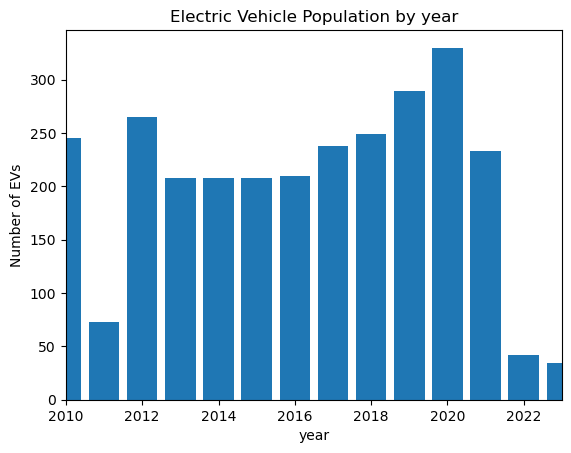

In [33]:
#Electric Vehicle Population by year
plt.bar(air_vechicl_final_df_resize['EV_year'],air_vechicl_final_df_resize['no_vehicle'])
plt.xlim(2010,2023)
plt.xlabel("year")
plt.ylabel("Number of EVs")
plt.title("Electric Vehicle Population by year")
plt.show()


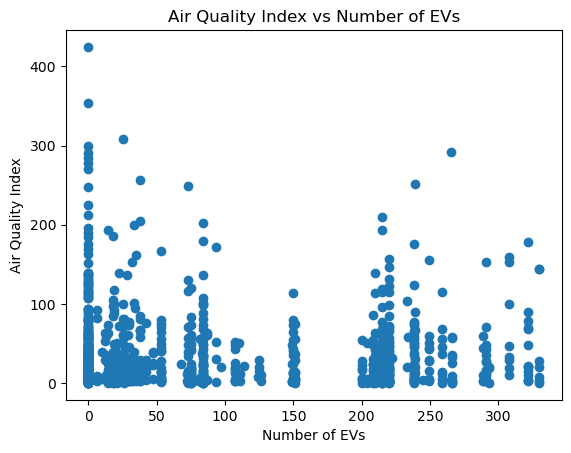

In [34]:
#Scatter plot for Air quality index by year
plt.scatter(air_vechicl_final_df_resize['no_vehicle'], air_vechicl_final_df_resize['data_value'])
plt.xlabel("Number of EVs")
plt.ylabel("Air Quality Index")
plt.title("Air Quality Index vs Number of EVs")
plt.show()

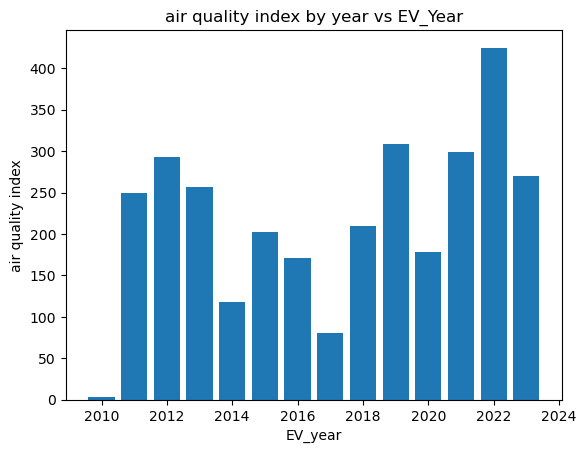

In [35]:
#bar plot for Air quality index by year
plt.bar(air_vechicl_final_df_resize['EV_year'],air_vechicl_final_df_resize['data_value'])
plt.xlabel("EV_year")
plt.ylabel("air quality index")
plt.title("air quality index by year vs EV_Year")
plt.show()


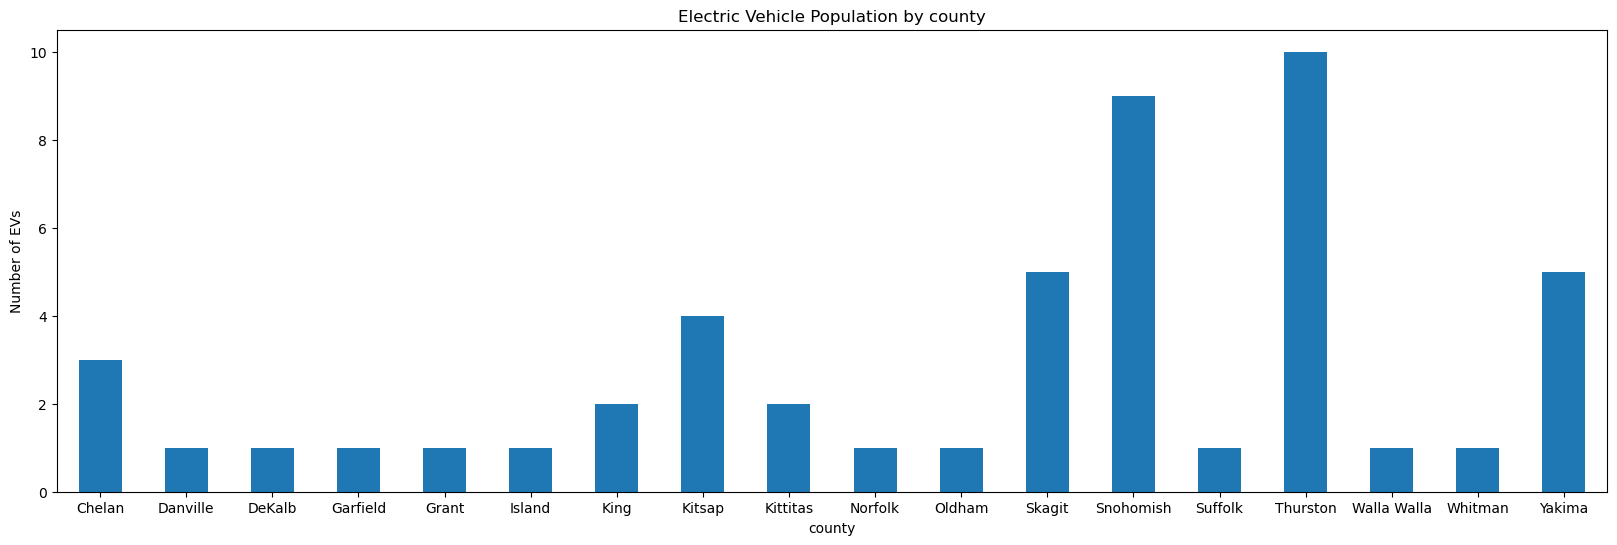

In [36]:
#Electric Vehicle Population by county
County_count = air_vechicl_final_df_resize[:50].groupby("County").size()
County_count.plot(kind="bar", rot=0,figsize=(20,6))
plt.xlabel("county")
plt.ylabel("Number of EVs")
plt.title("Electric Vehicle Population by county")
plt.show()

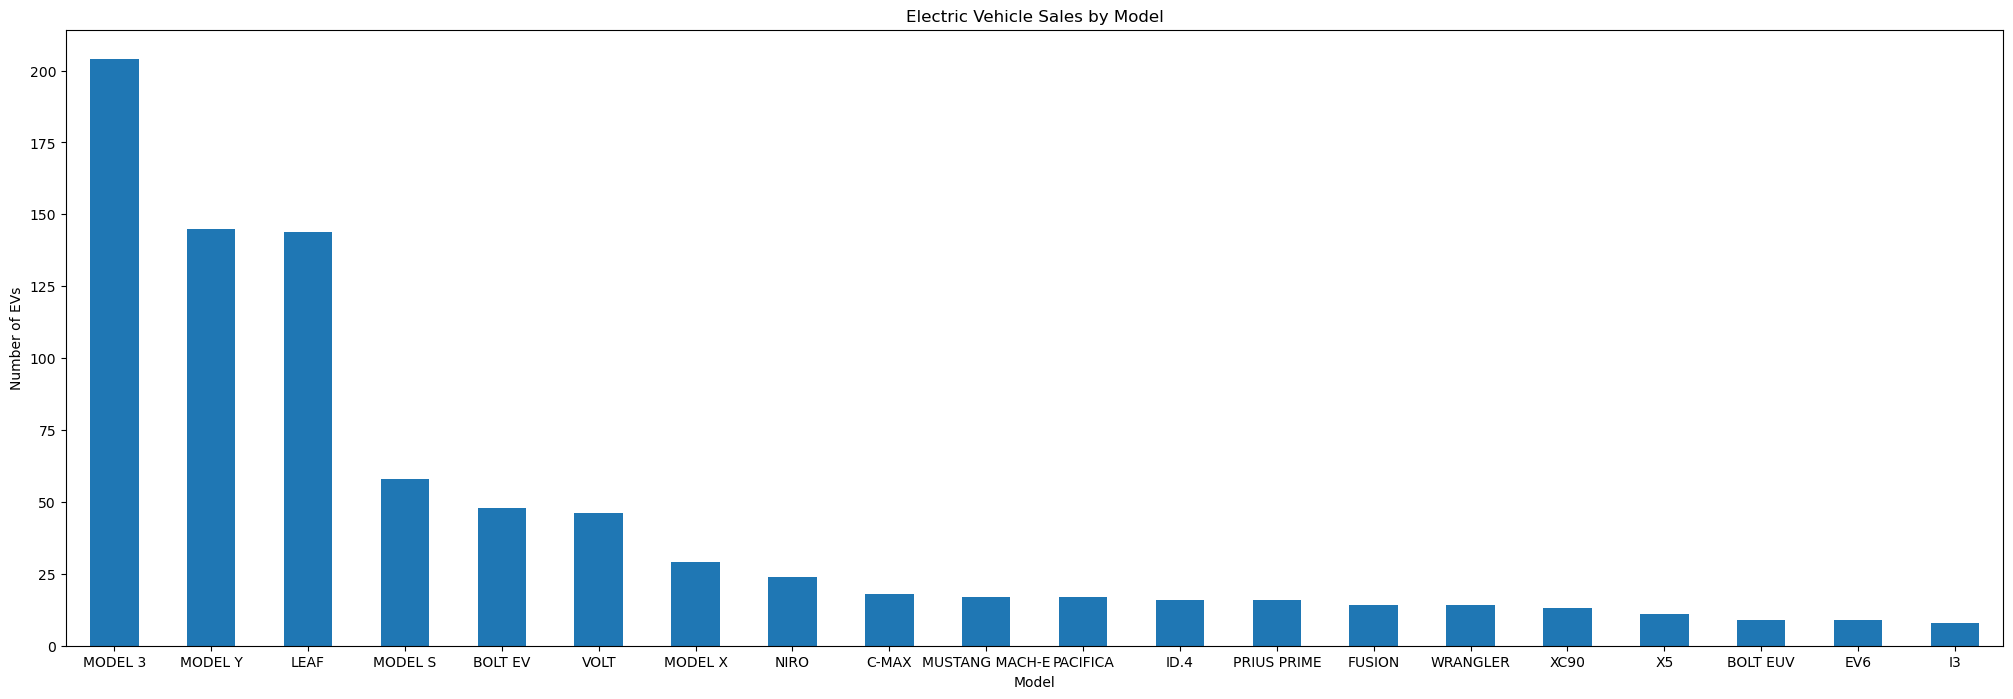

In [37]:
#Electric Vehicle Sales by Model
EV_Model_count = air_vechicl_final_df_resize.groupby("Model").size().sort_values(ascending=False)[:20]
EV_Model_count.plot(kind="bar", rot=0, figsize=(25, 8))
plt.xlabel("Model")
plt.ylabel("Number of EVs")
plt.title("Electric Vehicle Sales by Model")
plt.show()

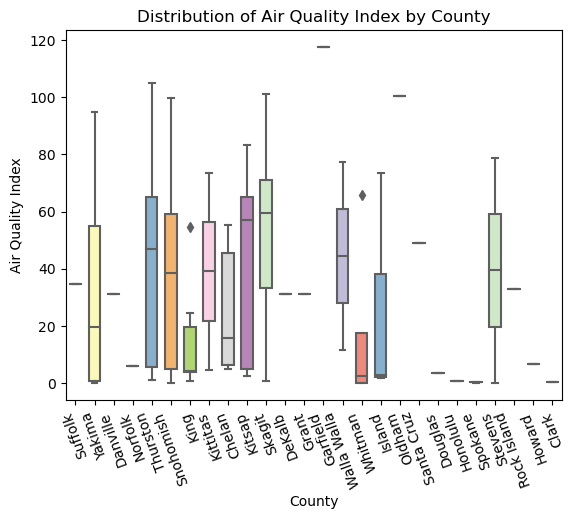

In [38]:
#Box plot for distribution of Air quality Index by County
sns.boxplot(x="County", y="data_value", data=air_vechicl_final_df_resize[:110], palette="Set3",saturation=0.85,
    width=0.6)
plt.xlabel("County")
plt.ylabel("Air Quality Index")
plt.title("Distribution of Air Quality Index by County")
plt.xticks(rotation=110)

plt.show()

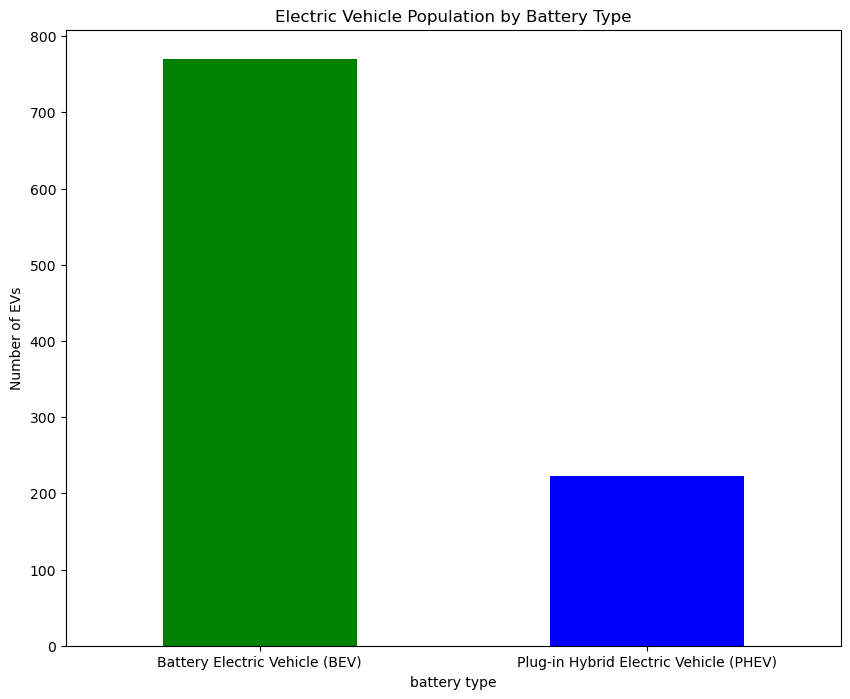

In [39]:
#Electric Vehicle Population by Battery Type
Electric_Vehicle_Type = air_vechicl_final_df_resize.groupby("Electric Vehicle Type").size()
colour = ['g' , 'b'] 
Electric_Vehicle_Type.plot(kind="bar", rot=0 , figsize=(10,8) , color = colour )
plt.xlabel("battery type")
plt.ylabel("Number of EVs")
plt.title("Electric Vehicle Population by Battery Type")
plt.show()


In [40]:
print(air_vechicl_final_df_resize.columns)

Index(['index', 'unique_id', 'indicator_id', 'name', 'measure', 'measure_info',
       'geo_type_name', 'geo_join_id', 'geo_place_name', 'time_period',
       'start_date', 'data_value', 'date', 'year', 'VIN (1-10)', 'County',
       'City', 'State', 'Postal Code', 'EV_year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'no_vehicle',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


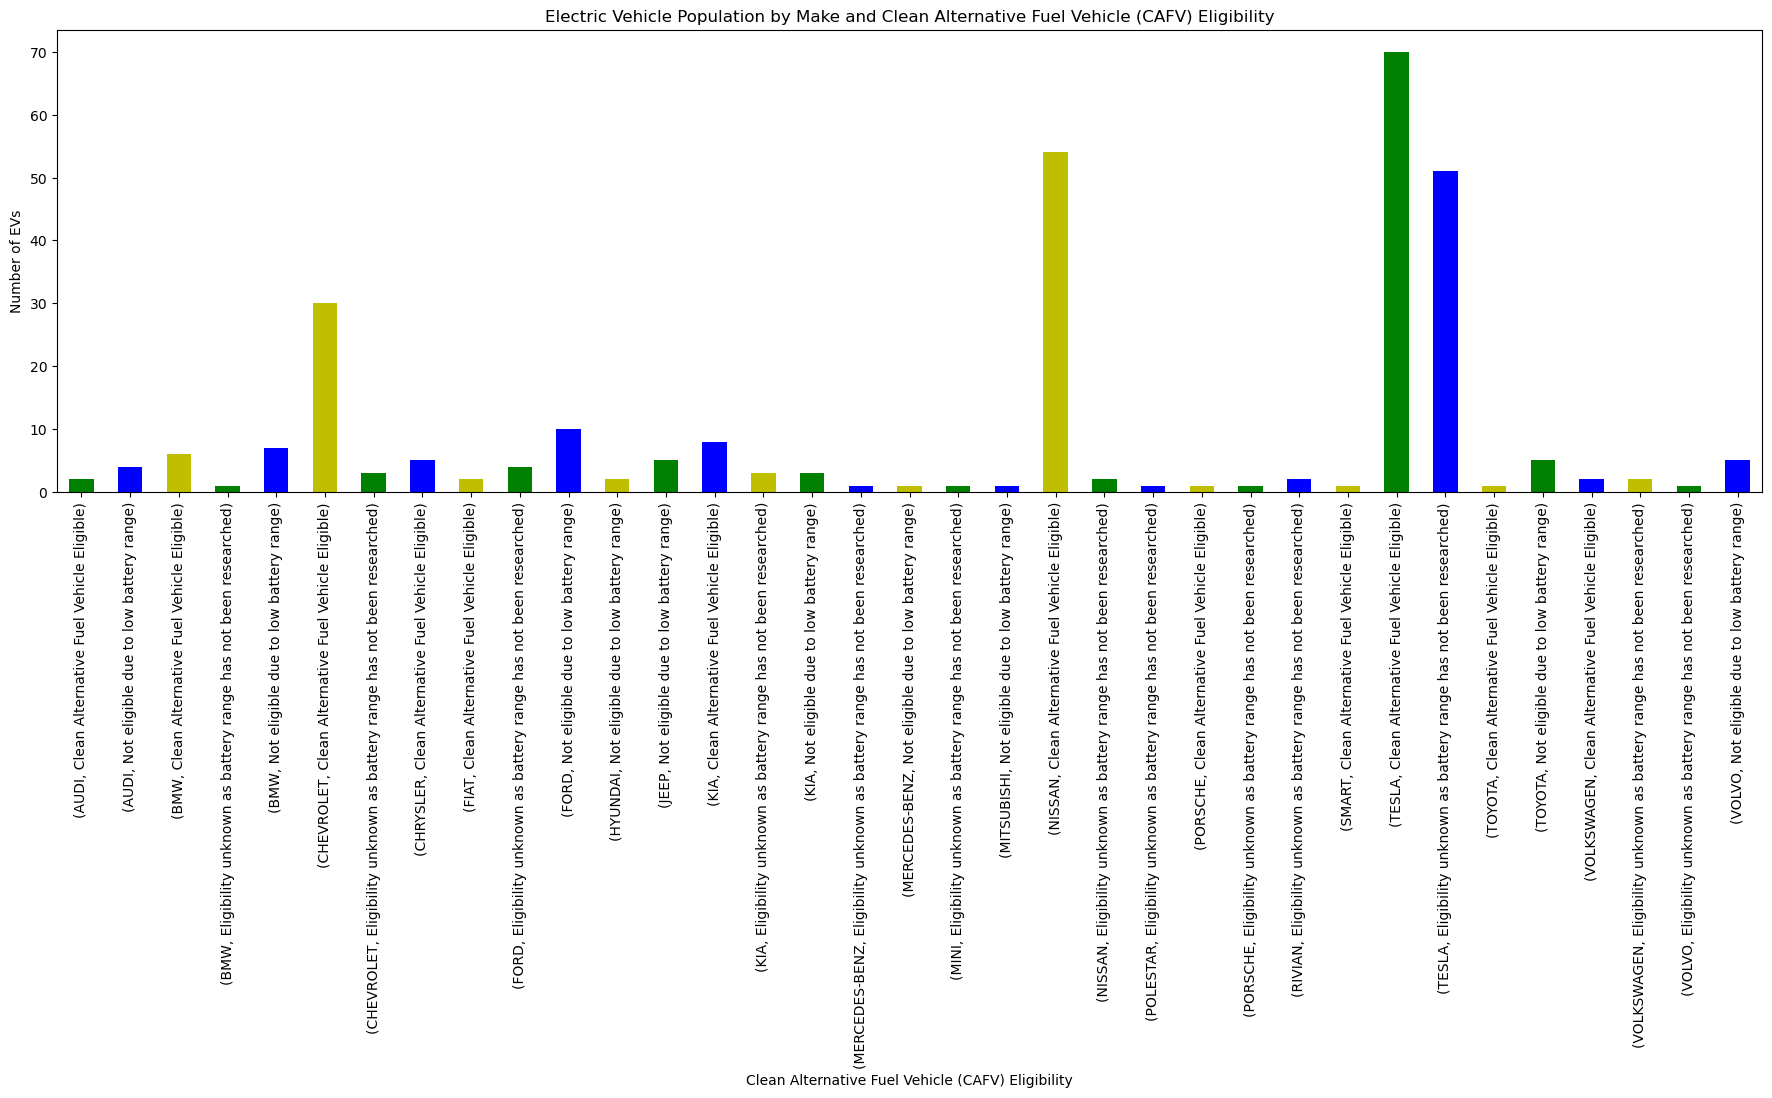

In [41]:
#Electric Vehicle Population by Make and Clean Alternative Fuel Vehicle Eligibility
CAFVE_counts = air_vechicl_final_df_resize[:300].groupby(["Make", 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']).size()
colour = ['g' , 'b' , 'y']
CAFVE_counts.plot(kind="bar", figsize=(22,6), rot=90 , color = colour)
plt.xlabel('Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.ylabel("Number of EVs")
plt.title("Electric Vehicle Population by Make and Clean Alternative Fuel Vehicle (CAFV) Eligibility")
plt.show()

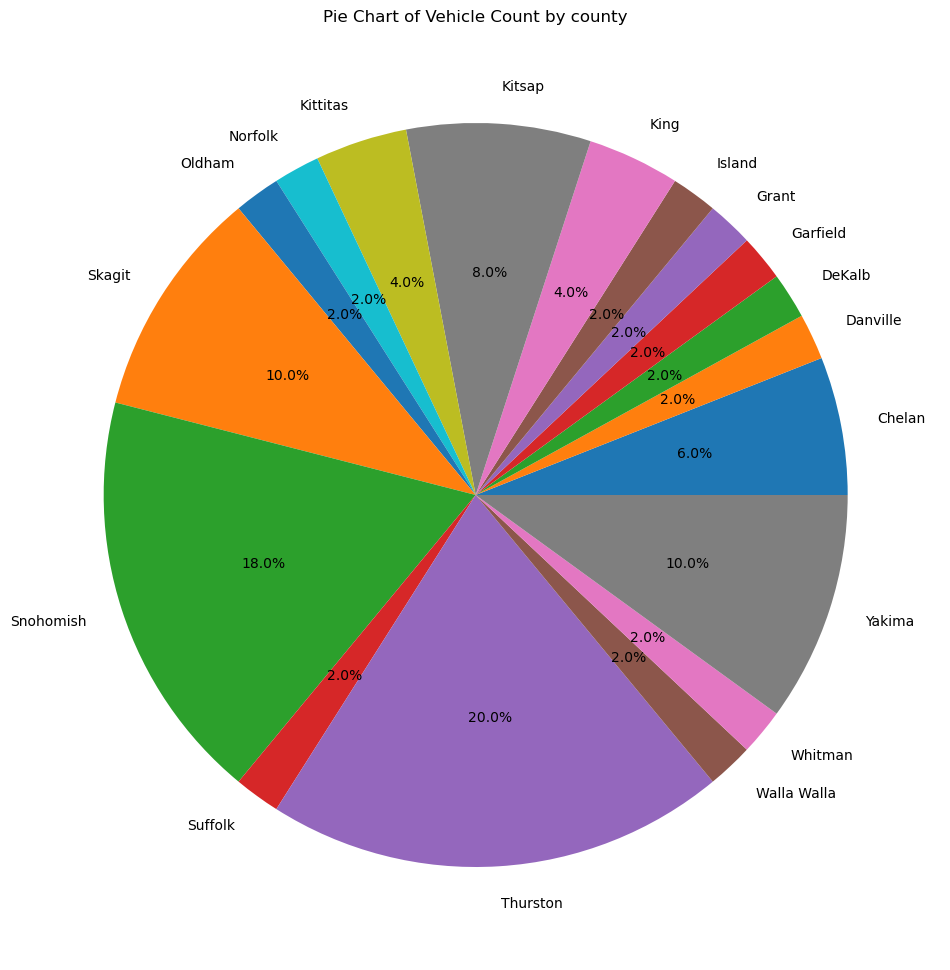

In [42]:
#Pie Chart of Vehicle Count by county
EV_counts = air_vechicl_final_df_resize[:50].groupby('County').size().reset_index(name='Count')
fig, ax = plt.subplots(figsize=(12, 18))
plt.pie(EV_counts['Count'], labels=EV_counts['County'], autopct='%1.1f%%')

plt.title("Pie Chart of Vehicle Count by county")
plt.show()

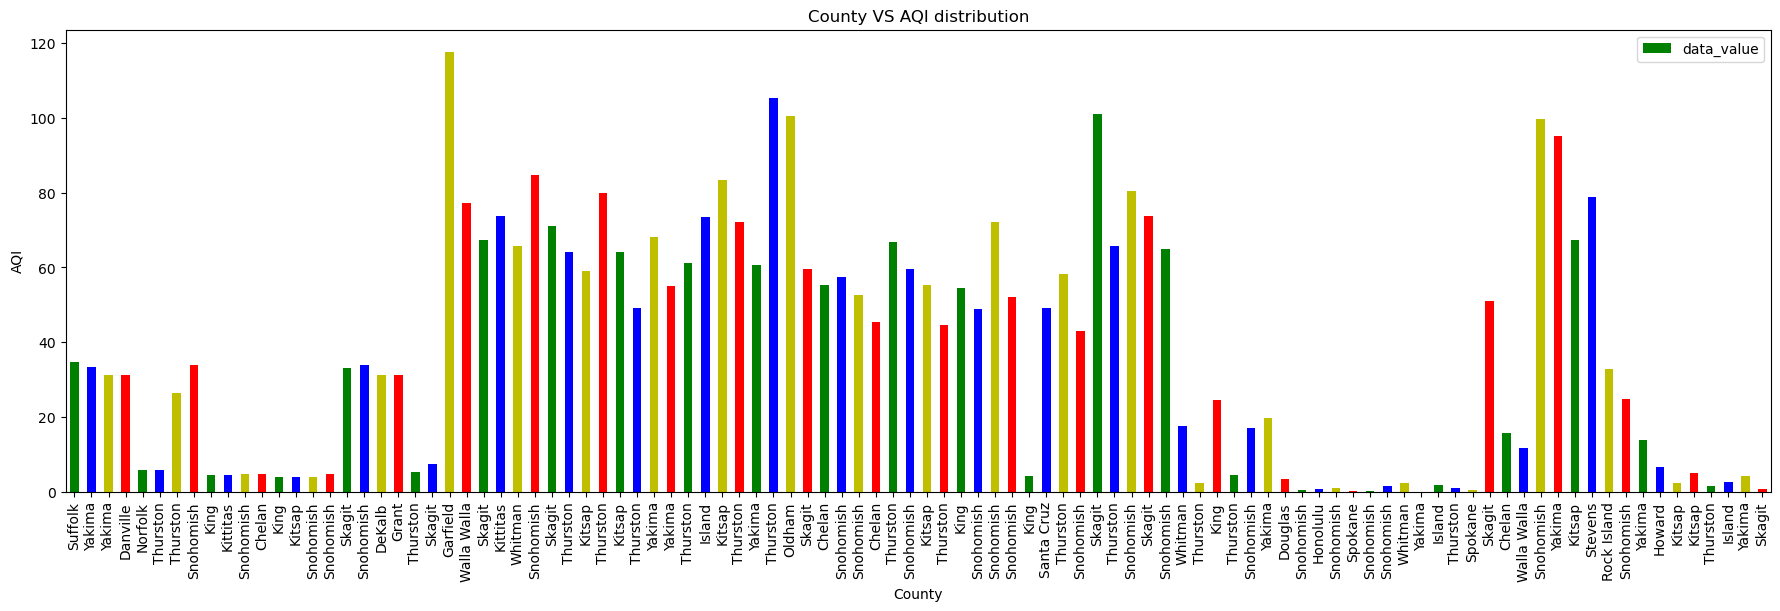

In [43]:
#distribution of AQI across different county
colour = ['g' , 'b' , 'y' , 'r']
air_vechicl_final_df_resize[:100].plot(kind="bar", x="County", y="data_value",figsize=(22,6),color=colour)
plt.xlabel("County")
plt.ylabel("AQI")
plt.title("County VS AQI distribution")
plt.show()

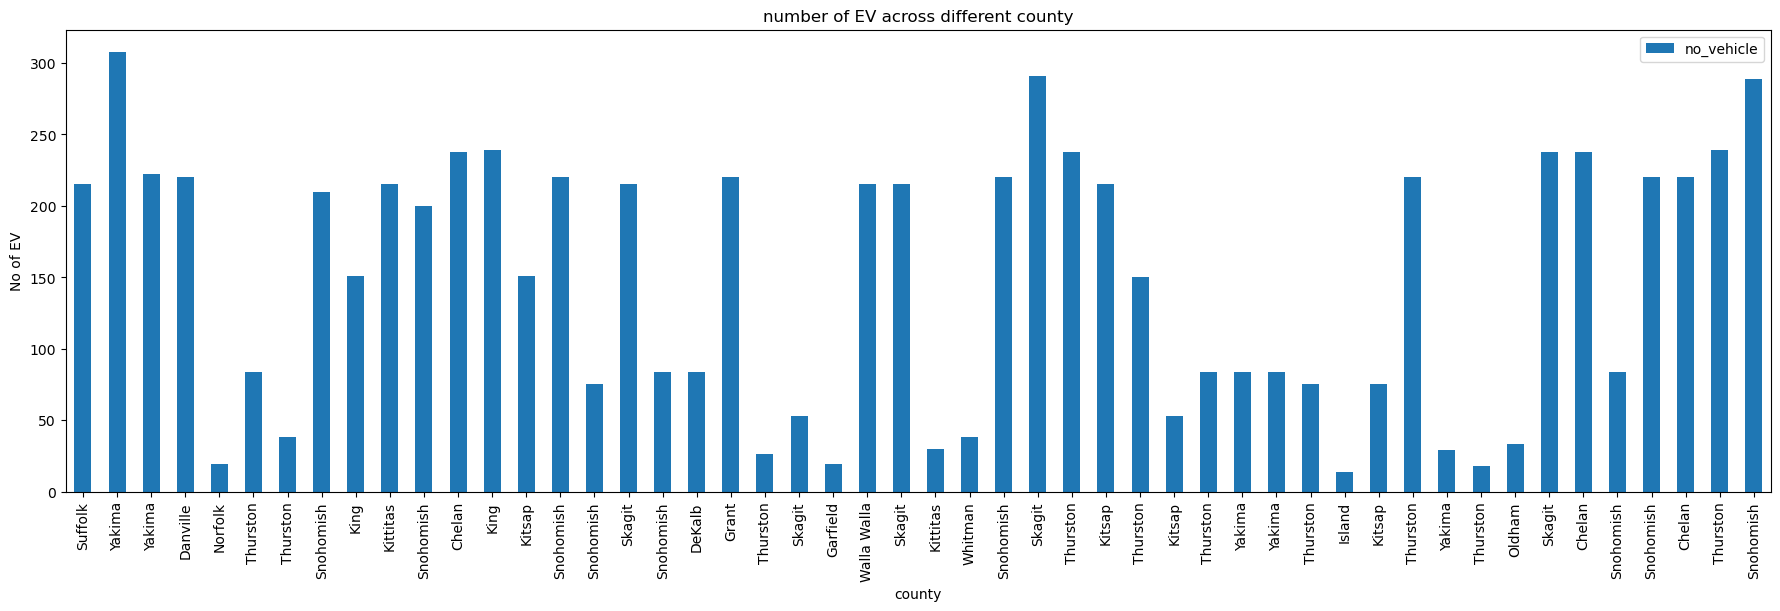

In [44]:
#number of EV across different county
air_vechicl_final_df_resize[:50].plot(kind="bar", x="County", y="no_vehicle",figsize=(22,6))
plt.xlabel("county")
plt.ylabel("No of EV")
plt.title("number of EV across different county")
plt.show()

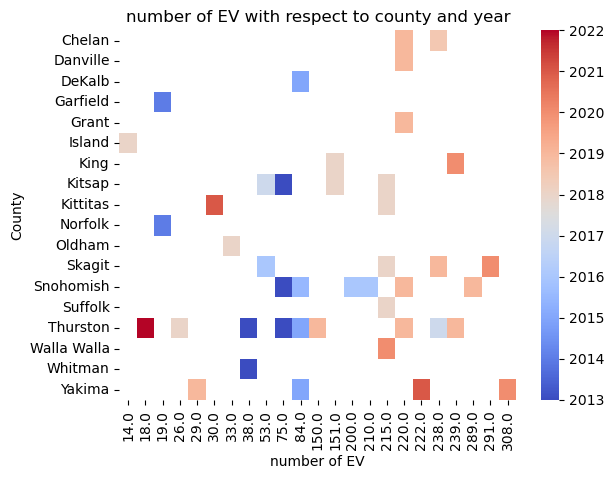

In [45]:
#Number of EV with respect to county and year
pivot = air_vechicl_final_df[:50].pivot_table(index='County', columns='no_vehicle', values='EV_year')

# Create a heatmap with the pivot table data
sns.heatmap(pivot, cmap='coolwarm')

# Add labels and title
plt.xlabel('number of EV')
plt.ylabel('County')
plt.title('number of EV with respect to county and year')
plt.show()

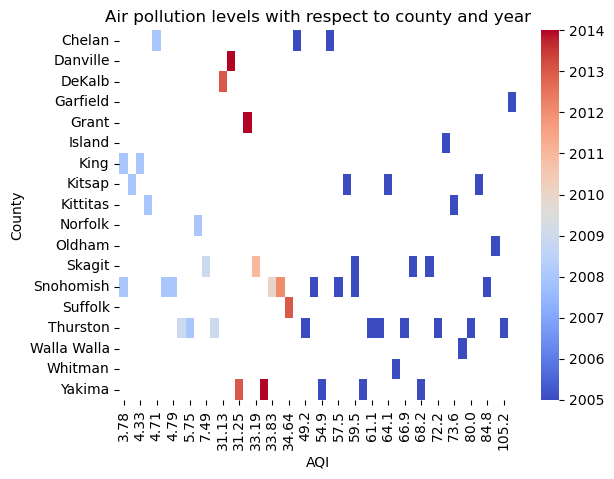

In [46]:
#Air pollution levels with respect to county and year
#here choosing first 50 rows to display clear graph 
pivot = air_vechicl_final_df[:50].pivot_table(index='County', columns='data_value', values='year')

# Creating a heatmap wrt pivot table data
sns.heatmap(pivot, cmap='coolwarm')

# Adding labels and title
plt.xlabel('AQI')
plt.ylabel('County')
plt.title('Air pollution levels with respect to county and year')
plt.show()

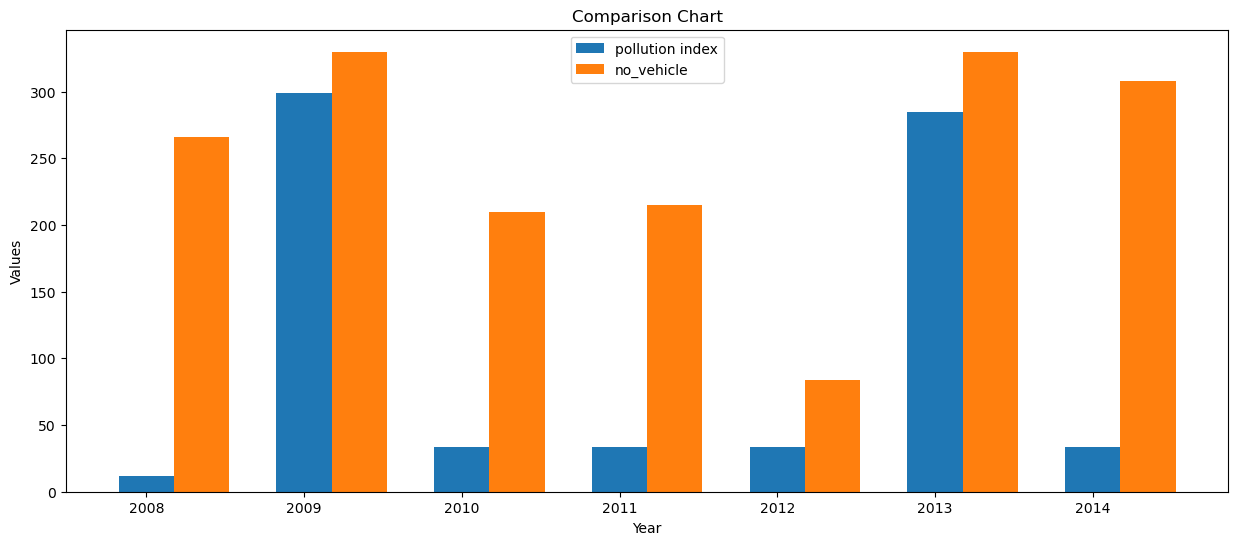

In [47]:
#Comparison of pollution level with respect to number of EV
fig,pl = plt.subplots(figsize=(15,6))

# Filter the data to only include years from 2008 onwards
data = air_vechicl_final_df[air_vechicl_final_df['year'] >= 2008][:600]

pl.set_title('Comparison Chart')
pl.set_xlabel('Year')
pl.set_ylabel('Values')

width = 0.35
pl.bar(data['year'], data['data_value'], width, label='pollution index')
pl.bar([x + width for x in data['year']], data['no_vehicle'], width, label='no_vehicle')
pl.legend()

plt.show()